In [ ]:
##  pandas library

In [60]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re

In [57]:
## import data 

In [58]:
df = pd.read_csv('reviews.csv') 

In [59]:
## check data 

In [44]:
df['content']

0        I have the same recurring tasks to do every da...
1        Instead of shopping around, I downloaded Any.d...
2        Why does every once in a while... out of the b...
3        Terrible Update! This app used to be perfect f...
4        This app is deceivingly terrible. There are so...
                               ...                        
16782                                        Excellent app
16783    I love it. Easy to use. Make my life organize....
16784    I love how I could make plans and check the ap...
16785                             Exactly what I needed!!!
16786                                          Very good 👍
Name: content, Length: 16787, dtype: object

In [68]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)    
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
## Convert upper case to lower case 

In [46]:
df['content'] = df['content'].str.lower()

In [47]:
df['content']

0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
                               ...                        
16782                                        excellent app
16783    i love it. easy to use. make my life organize....
16784    i love how i could make plans and check the ap...
16785                             exactly what i needed!!!
16786                                          very good 👍
Name: content, Length: 16787, dtype: object

In [ ]:
##check how many rows in data set 

In [30]:
print(df.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion',
       'sortOrder', 'appId'],
      dtype='object')


In [ ]:
## scan the stopword and remove 

In [ ]:
## data processing and data cleaning process 

In [49]:
def clean_text(text):
    # Convert non-string input to string and handle NaN values
    if pd.isna(text):
        return []  # Return an empty list if text is NaN
    else:
        # Proceed with cleaning and tokenization if text is not NaN
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha()]  # Keeps only alphabetic tokens
        return tokens

In [50]:
df['cleaned_reviews'] = df['content'].apply(clean_text)

In [51]:
lexicon = {'good': 1, 'bad': -1, 'neutral': 0}

In [52]:
def analyze_sentiment(words):
    return sum([lexicon.get(word, 0) for word in words])  # default score is 0 for unknown words

df['sentiment_score'] = df['cleaned_reviews'].apply(analyze_sentiment)

In [53]:
df['review_sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
sentiment_counts = df['review_sentiment'].value_counts()

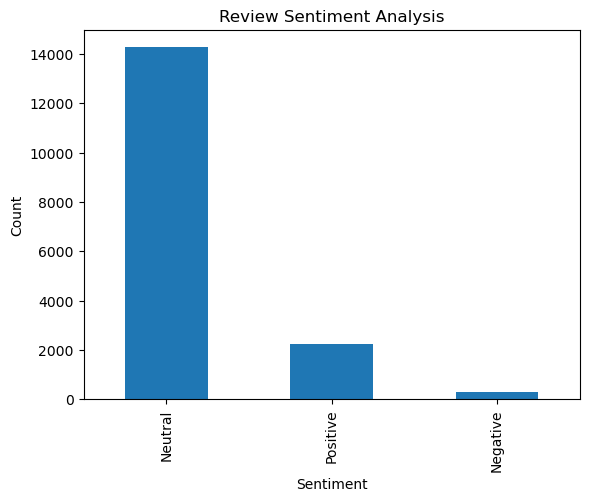

In [48]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar')
plt.title('Review Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [69]:
df.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


In [73]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 163.4 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/300.2 kB 269.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 261.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 297.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 288.1 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 315.4 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 327.5 kB/s

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [74]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

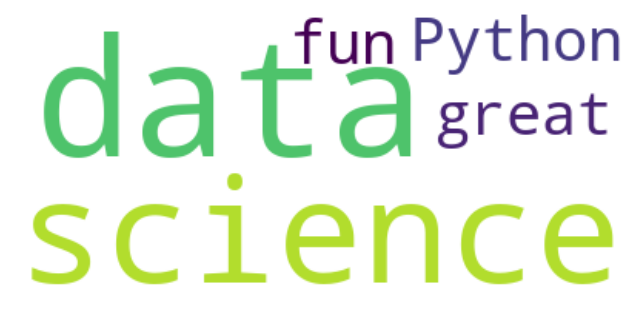

In [76]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Example text
text = 'Python is great for data science. Data science is fun.'

# Create a word cloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display the cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
##positive lecical analysis 

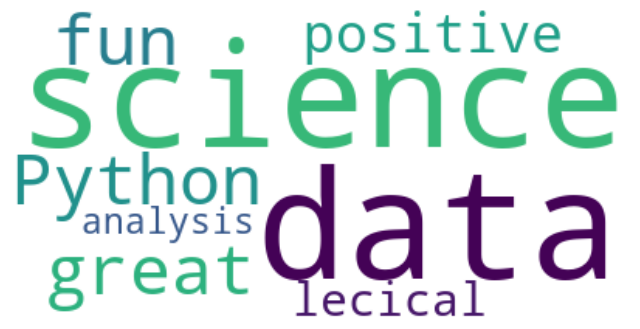

In [78]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Example text
text = 'Python is great for data science. Data science is fun.positive lecical analysis.'

# Create a word cloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display the cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
##positive lecical analysis 

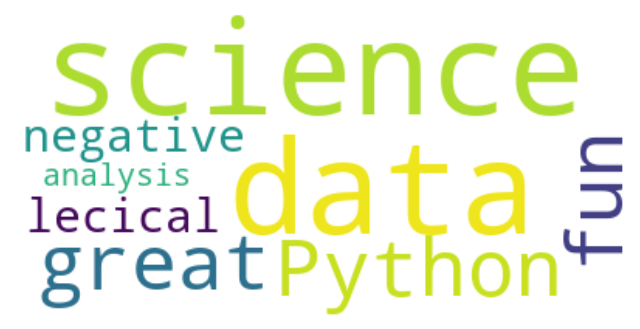

In [79]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Example text
text = 'Python is great for data science. Data science is fun.negative  lecical analysis.'

# Create a word cloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display the cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
##positive lecical analysis 

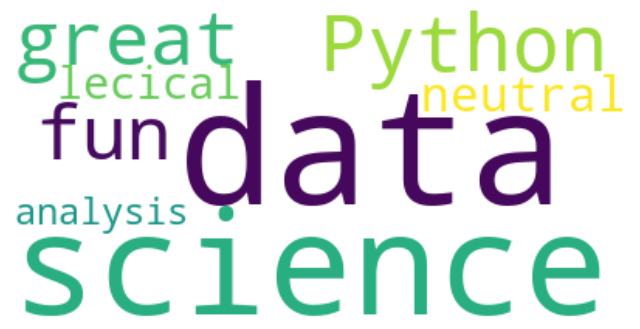

In [80]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Example text
text = 'Python is great for data science. Data science is fun.neutral  lecical analysis.'

# Create a word cloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display the cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()